In [52]:
import numpy as np
# 1. process data
import numpy as np
import matplotlib.pyplot as plt
iris = np.genfromtxt('iris_full.csv', dtype = None ,delimiter = ',', skip_header = True)
N = len(data_iris[:,0])
#M = data_iris.shape[0]
#print(M)
print('size:',N)
print(data_iris.shape)

data_X = data_iris[:,:4]

data_y = data_iris[:,4]
#indices = np.random.permutation(N)
#data_X = data_X[indices]
#data_y = data_y[indices]

X = np.c_[np.ones((N,1)),data_X]
y = data_y
theta = np.array([0.1,0.3,0.1,0.2,-0.1])
print('shape X\n', X.shape)
print('shape y\n',y.shape)
print('shape theta\n', theta.shape)

size: 100
(100, 5)
shape X
 (100, 5)
shape y
 (100,)
shape theta
 (5,)


In [53]:
print(X[:5])
print(y[:5])
print('theta\n',theta)

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0.]
theta
 [ 0.1  0.3  0.1  0.2 -0.1]


In [54]:
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z) )

def predict(x, theta):
    z = x.dot(theta)
    
    y_hat = sigmoid(z)
    return y_hat

def compute_loss(y_hat,y):
    return (-y*np.log(y_hat) - (1-y)*np.log(1-y_hat)).mean()

In [55]:
# training 
lr = 0.01
num_iter = 100
minibatch_size = 32
theta = np.array([0.1,0.5,0.1,0.5,-0.1])
losses = []
accs = []
for i in range(num_iter):
    # moi 1 epoch shuffled 1 lan
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0,N,minibatch_size):
        xi = X_shuffled[i: i+minibatch_size]
        yi = y_shuffled[i: i+minibatch_size]
        
        # compute output
        y_hat = predict(xi, theta)
        #print("y_hat",y_hat)
        #print(y_hat.shape)
        
        #compute loss
        
        loss = compute_loss(y_hat,yi)
        #print("loss",loss)
        #print("loss",loss.shape)
        
        # compute gradient
        gradients = np.dot(xi.T,(y_hat-yi))/yi.size
        
        # update theta
        theta  -=  lr*gradients
        
        # loss
        losses.append(loss)
        
        # accuracy
        # tinh do chinh xac cho 1 lan minibatch: 32
        preds = predict(xi, theta).round()
        acc = (preds == yi).mean() # tra ve a array 32 gia tri True or false
        accs.append(acc)
       
        

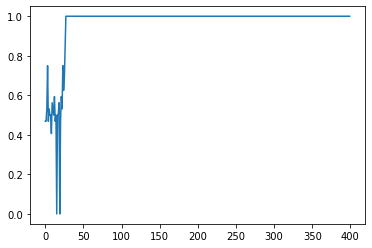

In [46]:
import matplotlib.pyplot as plt
plt.plot(accs)
plt.show()

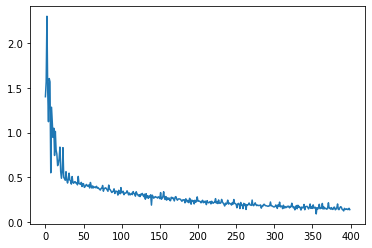

In [57]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()